In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
def abc_to_alphaBeta0(a, b, c):
  alpha = (2/3)*(a - b/2 - c/2)
  beta  = (2/3)*(np.sqrt(3)*(b-c)/2)
  z     = (2/3)*((a+b+c)/2)
  return alpha, beta, z

In [11]:
#create DF with time 
t_s = 0.00005
time = np.linspace(0, 1200*t_s, 1200-1)

wt = 50*2*math.pi

#create DF with time and a new index
measurements = pd.DataFrame(columns=['Time'], data=time)


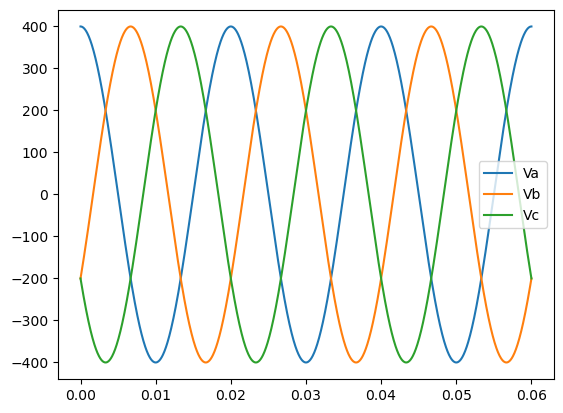

In [12]:
measurements['Va'] = measurements.apply(lambda row: 400*math.cos(wt*row['Time']), axis=1, result_type='expand')
measurements['Vb'] = measurements.apply(lambda row: 400*math.cos(wt*row['Time']-(2*math.pi/3)), axis=1, result_type='expand')
measurements['Vc'] = measurements.apply(lambda row: 400*math.cos(wt*row['Time']-(4*math.pi/3)), axis=1, result_type='expand')

plt.figure()
plot = plt.plot(measurements['Time'], measurements['Va'], label='Va')
plot = plt.plot(measurements['Time'], measurements['Vb'], label='Vb')
plot = plt.plot(measurements['Time'], measurements['Vc'], label='Vc')
plt.legend()

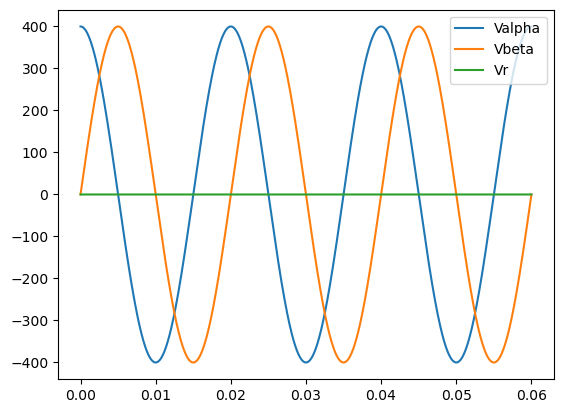

In [14]:
measurements[['Valpha', 'Vbeta', 'Vr']] = measurements.apply(lambda row: abc_to_alphaBeta0(row['Va'], row['Vb'], row['Vc']), axis=1, result_type='expand')

plt.figure()
plot = plt.plot(measurements['Time'], measurements['Valpha'], label='Valpha')
plot = plt.plot(measurements['Time'], measurements['Vbeta'], label='Vbeta')
plot = plt.plot(measurements['Time'], measurements['Vr'], label='Vr')
plt.legend()

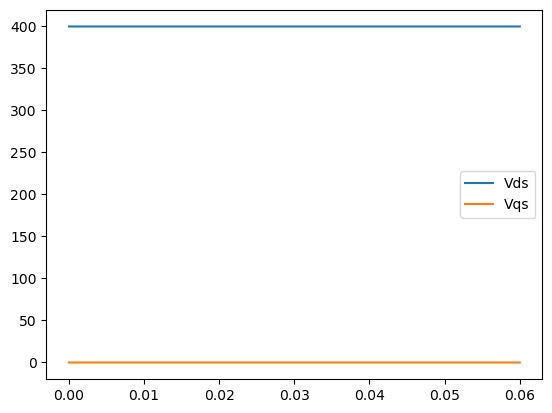

In [15]:
delta = 0

measurements['Vds'] = measurements.apply(lambda row: row['Valpha']*math.cos(wt*row['Time']+delta) + row['Vbeta']*math.sin(wt*row['Time']+delta), axis=1, result_type='expand')
measurements['Vqs'] = measurements.apply(lambda row: -row['Valpha']*math.sin(wt*row['Time']+delta) + row['Vbeta']*math.cos(wt*row['Time']+delta), axis=1, result_type='expand')

plt.figure()
plot = plt.plot(measurements['Time'], measurements['Vds'], label='Vds')
plot = plt.plot(measurements['Time'], measurements['Vqs'], label='Vqs')
plt.legend()